In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
# Obtendo o diretório atual do Jupyter Notebook
caminho_script = "\\".join(os.getcwd().split("\\")[:-1])
print("Caminho do diretório atual:", caminho_script)

# Adicionando o diretório ao sys.path se precisar importar módulos
sys.path.append(caminho_script)

# Importando suas classes
from classes.dadosClass.monteCarlo import MonteCarlo as mc
from classes.modelosLineares.MQOtradicional import MQOTradicional as MQOT
from classes.modelosLineares.MQOregularizado import MQORegularizado as MQOR


Caminho do diretório atual: c:\Users\henri\Documents\pythonProjcs\cadeira_IA_cirilo\av2\Regressao


## Mostrar dados

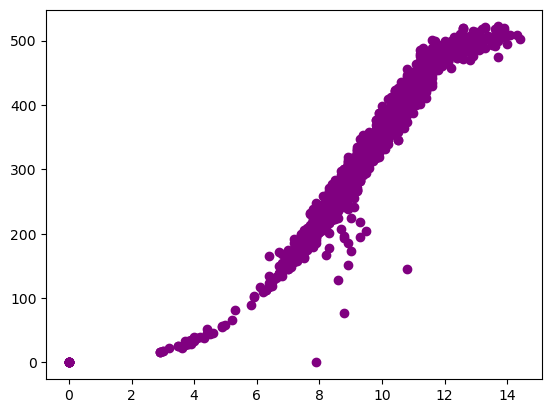

In [5]:
# pegar dados
x, y = mc(r"aerogerador.dat").getData()

# remover coluna de 1's
x = x[:, 1:]


plt.scatter(x, y, color='purple')
plt.show()


## Realizar testes

In [19]:
# Cria o retriever de dados
dada_retriver = mc(r"aerogerador.dat")

# Inicializa o dicionário para armazenar RSS
dict_rss = {
    "MQO tradicional": [],
    "Media dos valores obs": []
}
lambda_list = [0, 0.25, 0.5, 0.75, 1]
for i in lambda_list:
    dict_rss[f"MQO regularizado ({i})"] = []

def MQOtradicional(x_tre, y_tre, x_tes, y_tes):
    modelo = MQOT(x_tre, y_tre)  # Instancia o modelo MQO tradicional
    modelo.trainModel()  # Treina o modelo
    new_y = modelo.predict(x_tes)  # Faz predições com o conjunto de teste
    dict_rss["MQO tradicional"].append(np.sum((new_y.flatten() - y_tes.flatten()) ** 2))  # Calcula o RSS

def MQOregularizado(x_tre, y_tre, x_tes, y_tes):
    for lambd in lambda_list:
        modelo = MQOR(x_tre, y_tre, lambd)  # Instancia o modelo MQO regularizado com lambda
        modelo.trainModel()  # Treina o modelo
        new_y = modelo.predict(x_tes)  # Faz predições com o conjunto de teste
        dict_rss[f"MQO regularizado ({lambd})"].append(np.sum((new_y.flatten() - y_tes.flatten()) ** 2))  # Calcula o RSS

# Loop para 500 rodadas
for _ in range(500):
    treino, teste = dada_retriver.partitionData()  # Particiona os dados
    x_treino, y_treino = mc.formatMatrix(treino)  # Formata os dados de treinamento
    x_teste, y_teste = mc.formatMatrix(teste)  # Formata os dados de teste

    MQOtradicional(x_treino, y_treino, x_teste, y_teste)  # Executa o MQO tradicional
    MQOregularizado(x_treino, y_treino, x_teste, y_teste)  # Executa o MQO regularizado
    
    # Média dos valores observados
    y_pred_media = np.ones(y_teste.shape) * np.mean(y_treino)
    dict_rss["Media dos valores obs"].append(np.sum((y_teste - y_pred_media) ** 2))



## Formatar dados

In [15]:
# Nomes das colunas da tabela
name_columns = ["Modelos", "Media", "Desvio-Padrao", "Maior Valor", "Menor Valor"]
dict_table = {coluna: [] for coluna in name_columns}

# Preenche a coluna dos nomes dos modelos
dict_table["Modelos"] = list(dict_rss.keys())

# Calcula e preenche as outras colunas com as métricas para cada modelo
dict_table["Media"] = [np.mean(valores) for valores in dict_rss.values()]
dict_table["Desvio-Padrao"] = [np.std(valores) for valores in dict_rss.values()]
dict_table["Maior Valor"] = [np.max(valores) for valores in dict_rss.values()]
dict_table["Menor Valor"] = [np.min(valores) for valores in dict_rss.values()]

# Exibir a tabela
for i in range(len(dict_table["Modelos"])):
    print(f"{dict_table['Modelos'][i]:<25} Média: {dict_table['Media'][i]:.2f} | "
          f"Desvio-Padrão: {dict_table['Desvio-Padrao'][i]:.2f} | Maior Valor: {dict_table['Maior Valor'][i]:.2f} | "
          f"Menor Valor: {dict_table['Menor Valor'][i]:.2f}")


MQO tradicional           Média: 357153.01 | Desvio-Padrão: 71294.34 | Maior Valor: 620739.88 | Menor Valor: 207045.93
Media dos valores obs     Média: 5003934.72 | Desvio-Padrão: 262945.98 | Maior Valor: 5808965.83 | Menor Valor: 4324229.75
MQO regularizado (0)      Média: 357153.01 | Desvio-Padrão: 71294.34 | Maior Valor: 620739.88 | Menor Valor: 207045.93
MQO regularizado (0.25)   Média: 357152.25 | Desvio-Padrão: 71281.05 | Maior Valor: 620680.03 | Menor Valor: 207064.31
MQO regularizado (0.5)    Média: 357151.50 | Desvio-Padrão: 71267.77 | Maior Valor: 620620.22 | Menor Valor: 207082.71
MQO regularizado (0.75)   Média: 357150.77 | Desvio-Padrão: 71254.49 | Maior Valor: 620560.43 | Menor Valor: 207101.13
MQO regularizado (1)      Média: 357150.05 | Desvio-Padrão: 71241.21 | Maior Valor: 620500.67 | Menor Valor: 207119.56


In [18]:
# Configuração para evitar quebra de linha
pd.set_option('display.width', 1000)  # Define uma largura maior para o display
pd.set_option('display.max_columns', None)  # Mostra todas as colunas sem quebras
pd.set_option('display.max_colwidth', None)  # Exibe o conteúdo das colunas sem truncar

# Criar e exibir o DataFrame
df_results = pd.DataFrame(dict_table)
print(df_results)


                   Modelos         Media  Desvio-Padrao   Maior Valor   Menor Valor
0          MQO tradicional  3.571530e+05   71294.342102  6.207399e+05  2.070459e+05
1    Media dos valores obs  5.003935e+06  262945.984141  5.808966e+06  4.324230e+06
2     MQO regularizado (0)  3.571530e+05   71294.342102  6.207399e+05  2.070459e+05
3  MQO regularizado (0.25)  3.571522e+05   71281.051943  6.206800e+05  2.070643e+05
4   MQO regularizado (0.5)  3.571515e+05   71267.766327  6.206202e+05  2.070827e+05
5  MQO regularizado (0.75)  3.571508e+05   71254.485250  6.205604e+05  2.071011e+05
6     MQO regularizado (1)  3.571501e+05   71241.208713  6.205007e+05  2.071196e+05


In [ ]:
df_results.to_csv("resultados_modelos.csv", index=False)